In [1]:
import pandas as pd

# 讀取資料
data = pd.read_csv("diet_data_cleaned.csv")

### 1. 主成分分析 (PCA)

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 標準化數據
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# PCA 降維
pca = PCA(n_components=46)  # 降到 50 維
reduced_data_pca = pca.fit_transform(normalized_data)

# 查看主成分貢獻率
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio[:10])  # 前 10 個主成分的貢獻率

# 累積解釋變異量
print(f"Cumulative Explained Variance: {explained_variance_ratio.sum():.2f}")

Explained Variance Ratio: [0.06274064 0.03859979 0.02935487 0.02563795 0.02393534 0.02202975
 0.02179101 0.02099701 0.02044475 0.02001483]
Cumulative Explained Variance: 0.90


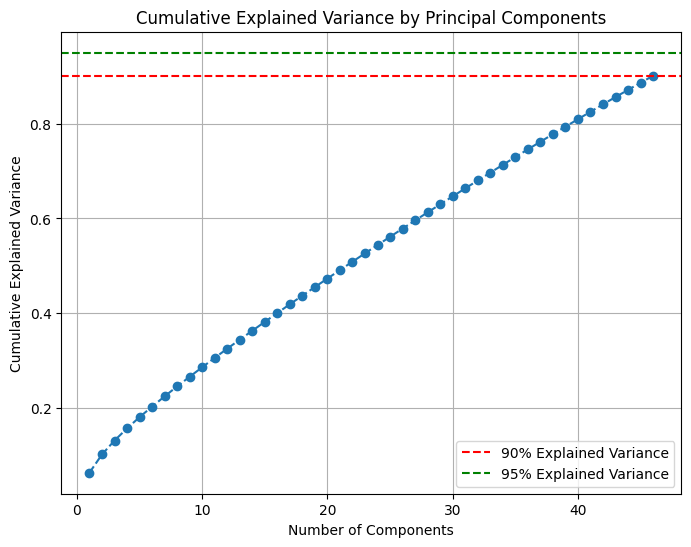

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 假設 cumulative_variance 包含累積解釋方差比例
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

### 2. 稀疏主成分分析 (Sparse PCA)

In [9]:
from sklearn.decomposition import SparsePCA

# Sparse PCA 降維
sparse_pca = SparsePCA(n_components=10, random_state=42)
reduced_data_sparse_pca = sparse_pca.fit_transform(normalized_data)

# 查看稀疏主成分矩陣
print("Sparse PCA Components:")
print(sparse_pca.components_)

Sparse PCA Components:
[[ 0.00000000e+00  2.23839740e-02 -1.88837493e-02  0.00000000e+00
   3.93431177e-02  1.69024659e-02  0.00000000e+00  5.86032051e-02
   0.00000000e+00  0.00000000e+00  1.70666594e-03 -1.17177353e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  2.85633175e-02
   0.00000000e+00  3.88386664e-03  0.00000000e+00 -6.64921137e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.47956247e-05
   2.41749531e-01  3.92972328e-01  9.07672376e-02  2.06435549e-03
  -2.55783987e-03  2.87608510e-01  0.00000000e+00 -1.12424333e-02
   1.42582538e-03  5.44253106e-02  0.00000000e+00  2.33558268e-01
  -1.08733858e-02  4.17174019e-01  0.00000000e+00 -2.02060149e-02
   4.59907565e-01  2.28702911e-02  1.35325256e-01 -6.17116263e-03
  -1.37285836e-02  2.11463195e-01  5.64842353e-02  0.00000000e+00
   4.40501692e-02  3.71454352e-01 -5.03410790e-02  0.00000000e+00
   1.89426816e-01  0.00000000e+00]
 [ 0.00000000e+00  1.11740481e-01  3.32353983e-03 -1.66734361e-02
   0.00000000e+00 

### 3. 非負矩陣分解 (NMF)

In [11]:
from sklearn.decomposition import NMF

# 確保數據為非負值
normalized_data_non_negative = normalized_data - normalized_data.min()

# NMF 降維
nmf = NMF(n_components=10, random_state=42)
reduced_data_nmf = nmf.fit_transform(normalized_data_non_negative)

# 查看基矩陣 (W) 和係數矩陣 (H)
print("NMF Basis Matrix Shape:", nmf.components_.shape)

NMF Basis Matrix Shape: (10, 54)


### 4. UMAP (Uniform Manifold Approximation and Projection)

In [3]:
import umap
import matplotlib.pyplot as plt

# UMAP 降維
umap_reducer = umap.UMAP(n_components=2, random_state=42)
reduced_data_umap = umap_reducer.fit_transform(normalized_data)

# 繪製降維後結果
plt.scatter(reduced_data_umap[:, 0], reduced_data_umap[:, 1], s=1, alpha=0.5)
plt.title("UMAP Reduced Data")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

2024-11-18 11:48:52.462153: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 11:48:52.584089: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 11:48:52.676800: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731901732.776473    6976 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731901732.802991    6976 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 11:48:53.029846: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

KeyboardInterrupt: 

### 5. T-SNE

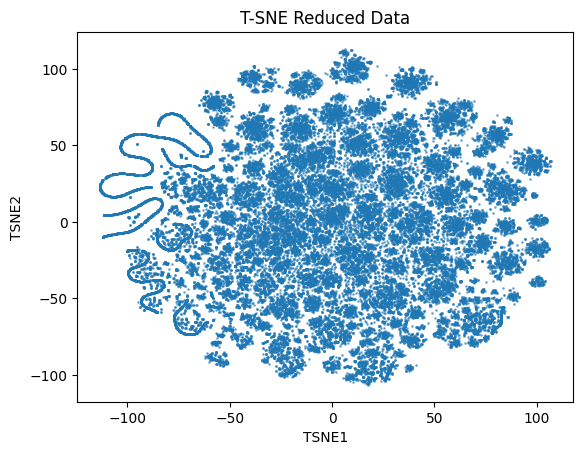

In [ ]:
from sklearn.manifold import TSNE

# T-SNE 降維
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(normalized_data)

# 繪製降維後結果
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], s=1, alpha=0.5)
plt.title("T-SNE Reduced Data")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()

2024-11-18 13:32:24,519 - INFO - Running KMeans with k=2
2024-11-18 13:33:25,378 - INFO - k=2, SSE=190418800.0, Silhouette Score=0.32522618770599365
2024-11-18 13:33:25,379 - INFO - Running KMeans with k=3
2024-11-18 13:34:28,228 - INFO - k=3, SSE=116422064.0, Silhouette Score=0.36580225825309753
2024-11-18 13:34:28,229 - INFO - Running KMeans with k=4
2024-11-18 13:35:28,054 - INFO - k=4, SSE=85882784.0, Silhouette Score=0.3524138331413269
2024-11-18 13:35:28,056 - INFO - Running KMeans with k=5
2024-11-18 13:36:29,796 - INFO - k=5, SSE=69842272.0, Silhouette Score=0.33241769671440125
2024-11-18 13:36:29,797 - INFO - Running KMeans with k=6
2024-11-18 13:37:31,689 - INFO - k=6, SSE=57521056.0, Silhouette Score=0.3602713346481323
2024-11-18 13:37:31,691 - INFO - Running KMeans with k=7
2024-11-18 13:38:48,042 - INFO - k=7, SSE=47685284.0, Silhouette Score=0.3585079312324524
2024-11-18 13:38:48,043 - INFO - Running KMeans with k=8
2024-11-18 13:40:10,007 - INFO - k=8, SSE=42010796.0, Si

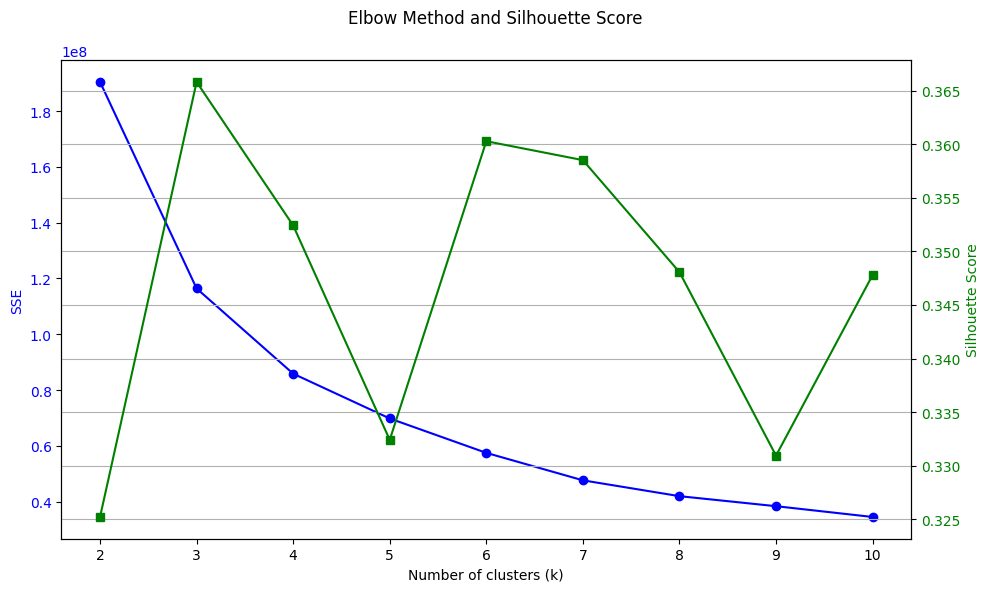

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import logging

# 設定 logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 設定 K 的範圍
k_values = range(2, 11)
sse = []
silhouette_scores = []

# 計算 SSE 和輪廓係數
for k in k_values:
    logging.info(f"Running KMeans with k={k}")
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(reduced_data_tsne)
    sse.append(kmeans.inertia_)
    score = silhouette_score(reduced_data_tsne, labels)
    silhouette_scores.append(score)
    logging.info(f"k={k}, SSE={kmeans.inertia_}, Silhouette Score={score}")

# 繪製肘部法則和輪廓係數
logging.info("Plotting Elbow Method and Silhouette Score")
fig, ax1 = plt.subplots(figsize=(10, 6))

# 肘部法則
ax1.plot(k_values, sse, marker='o', color='blue', label='SSE')
ax1.set_xlabel("Number of clusters (k)")
ax1.set_ylabel("SSE", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 輪廓係數
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, marker='s', color='green', label='Silhouette Score')
ax2.set_ylabel("Silhouette Score", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 添加標題與圖例
fig.suptitle("Elbow Method and Silhouette Score")
fig.tight_layout()
plt.grid(True)
plt.show()

### 6. 自動編碼器 (Autoencoder)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# 自動編碼器模型
input_dim = normalized_data.shape[1]
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

# 編譯和訓練模型
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(normalized_data, normalized_data, epochs=50, batch_size=256, shuffle=True)

# 提取降維數據
reduced_data_autoencoder = encoder.predict(normalized_data)

2024-11-17 23:48:47.575981: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 23:48:47.579479: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 23:48:47.590711: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731858527.601718  287061 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731858527.605021  287061 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 23:48:47.618573: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/50


W0000 00:00:1731858529.092301  287061 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1867
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9503
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8950
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8736
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8493
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8449
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8387
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8182
Epoch 9/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8173
Epoch 10/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8186
Epoch 11/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8082
Epoch 12/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8027
Epoch 13/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7943
Epoch 14/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7973
Epoch 15/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8053
